In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
today = pd.Timestamp.today()
start = today-pd.Timedelta(days=365)
start_date = start.strftime('%Y-%m-%d')


In [5]:
start_date

'2023-03-03'

In [11]:
symbol="SPY"
df_stock = yf.download(symbol, start= start_date, end= today)[["Adj Close"]].copy()


[*********************100%%**********************]  1 of 1 completed


In [9]:
df_stock.head()

,Adj Close
Date,
2023-03-03,398.138824
2023-03-06,398.414612
2023-03-07,392.307434
2023-03-08,392.947754
2023-03-09,385.697906


In [12]:
df_stock["returns"]= np.log(df_stock["Adj Close"]/df_stock["Adj Close"].shift(1))

In [15]:
df_stock.head()

,Adj Close,returns
Date,,
2023-03-06,398.414642,0.000693
2023-03-07,392.307434,-0.015447
2023-03-08,392.947723,0.001631
2023-03-09,385.697906,-0.018622
2023-03-10,380.132538,-0.014534


In [14]:
df_stock.dropna(inplace=True)

In [16]:
mean_returns = df_stock["returns"].mean()
std_returns = df_stock["returns"].std()

In [17]:
mean_returns, std_returns

(0.0010127307366005552, 0.007709613982281121)

In [19]:
1+np.random.normal(mean_returns, std_returns, 10)

array([0.99942604, 0.99715472, 1.00053367, 1.01458779, 1.00397673,
       0.98829431, 0.99637675, 0.99829051, 0.99810904, 1.00718816])

In [20]:
df_stock.tail()

,Adj Close,returns
Date,,
2024-02-26,505.989990,-0.003669
2024-02-27,506.929993,0.001856
2024-02-28,506.260010,-0.001323
2024-02-29,508.079987,0.003588
2024-03-01,512.849976,0.009344


In [46]:
#SIMULACION DE MONTECARLO
def montecarlo_simulations(df_prices, n_simulations=10000, n_days=30, mu=0, sigma=1):
    simulated_prices= np.zeros((n_simulations, n_days))
    initial_price = df_prices.iloc[-1]
    simulated_prices[:,0]=initial_price

    for i in range(1, n_days):
        simulated_prices[:,i]=simulated_prices[:,i-1]*(1+np.random.normal(mu,sigma,n_simulations))
    
    return simulated_prices

In [47]:
simulated_prices=montecarlo_simulations(df_stock["Adj Close"],n_simulations=10000,n_days=30,mu=mean_returns,sigma=std_returns)

In [48]:
simulated_prices

array([[512.84997559, 516.48575366, 513.23159029, ..., 560.35788305,
        554.72666895, 557.33166793],
       [512.84997559, 512.16260717, 509.39312791, ..., 515.91642895,
        510.54102283, 510.66093084],
       [512.84997559, 515.32978602, 520.54685979, ..., 527.79408238,
        538.40391237, 535.53552762],
       ...,
       [512.84997559, 514.23290918, 515.66311042, ..., 512.83355607,
        517.21786261, 522.75493377],
       [512.84997559, 514.5142942 , 515.72298966, ..., 552.91782256,
        551.76826972, 552.05928446],
       [512.84997559, 514.43982503, 517.22841964, ..., 539.32493711,
        541.54245628, 543.11768275]])

In [49]:
simulated_prices_flat=simulated_prices[:,1:].flatten()

In [50]:
len(simulated_prices_flat)

290000

In [51]:
percentile_5=np.percentile(simulated_prices_flat,5)

In [52]:
print(f"95% of the simulated prices will be above{percentile_5:.2f}")

95% of the simulated prices will be above497.45


In [53]:
percentile_2_5=np.percentile(simulated_prices[:,-1],2.5)
percentile_97_5=np.percentile(simulated_prices[:,-1],97.5)

In [55]:
print(f"95% de confianza de que el precio estara entre{percentile_2_5:.2f} y{percentile_97_5:.2f}")

95% de confianza de que el precio estara entre487.65 y572.48


In [56]:
expected_value=np.mean(simulated_prices[:,-1])

In [57]:
expected_value

528.6315022665473

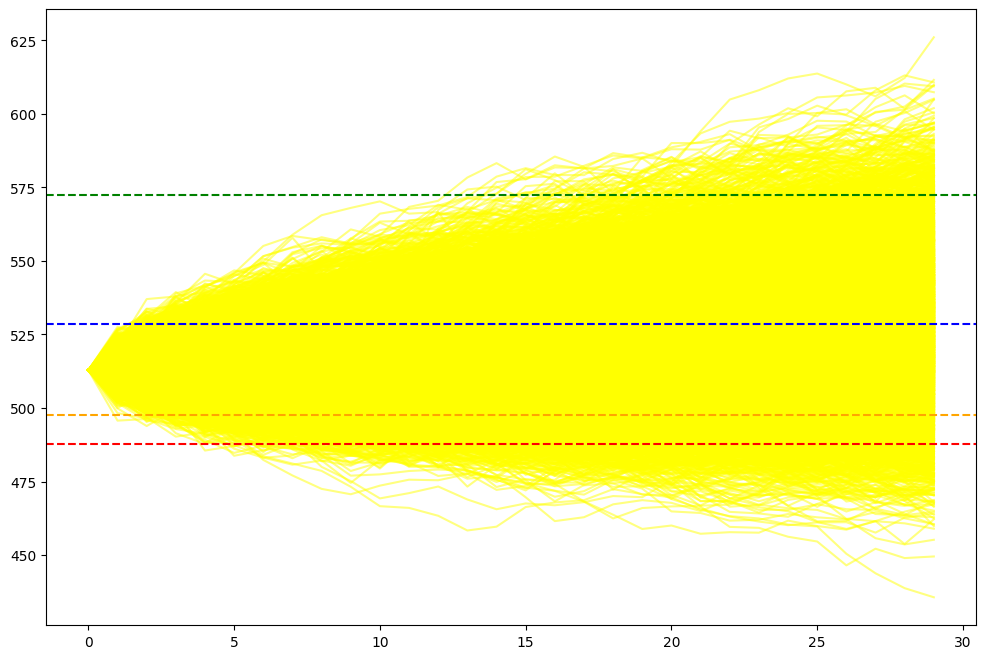

In [58]:
plt.figure(figsize=(12,8))
plt.plot(simulated_prices.T, color="yellow",alpha=0.5)
plt.axhline(percentile_97_5, color="green", linestyle="--")
plt.axhline(percentile_5, color="orange", linestyle="--")
plt.axhline(percentile_2_5, color="red", linestyle="--")
plt.axhline(expected_value, color="blue",linestyle="--")
plt.show()

In [59]:
df_stock.tail()

,Adj Close,returns
Date,,
2024-02-26,505.989990,-0.003669
2024-02-27,506.929993,0.001856
2024-02-28,506.260010,-0.001323
2024-02-29,508.079987,0.003588
2024-03-01,512.849976,0.009344


In [60]:
expected_value

528.6315022665473